In [52]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

In [53]:
df = pd.read_csv("matchups1-1.csv")
df

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,Unnamed: 13
0,BR1_2304032235_utility,5218,16,False,1,6,6,Bard,28,UNNl1KcPO98UoXiuRpQBefEKJbtCF_80b0_2s0Cwa5FiYi...,4500,batata 12121212,11.13.382.1241,NaN
1,BR1_2304032235_utility,7515,29,True,1,20,1,Blitzcrank,40,w2DLeo91qdfD72dpGgapMOKh_4IZ9IMF29neabiS0QTe8W...,7716,love yourseIf,11.13.382.1241,NaN
2,BR1_2304032235_jungle,9197,47,False,5,5,5,Nocturne,17,wDtmVguiopT93yrxtv2L88LxAVWC8E2fj_F3FDW81nCuSU...,9696,NTM HACKER,11.13.382.1241,NaN
3,BR1_2304032235_jungle,10564,37,True,6,8,4,Kayn,12,zVKtTZrdKVIpXwIMlsuSQjwOgqxx0DMhnWDFL7MrAKxXZq...,15291,unsuri,11.13.382.1241,NaN
4,BR1_2303451507_top,10598,158,False,6,8,7,Pantheon,17,sTevUOXxKjNW7dpbtyu9wjn8KZxzN63_f2MfGc1EALDjtq...,20568,Nome e Numeros,11.13.382.1241,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,BR1_2305743820_jungle,8144,9,False,4,5,6,Volibear,17,lXSPXoNy-s1uOSWKv4bhojwjV1NlivX1McJ73zK91MvAFt...,10992,th 11,11.13.382.1241,NaN
49996,BR1_2305697150_top,10559,150,True,6,12,1,Aatrox,19,7t_R1cG_2ve2ySy4gvZZ0uFGBqrwbZaTIlovYGjzKnnltZ...,13984,NACH0,11.13.382.1241,NaN
49997,BR1_2305697150_top,8368,144,False,3,0,9,Viego,17,6gDuhvOExckQpmj-j8eifUAXdnIvTvX9yi5tsxs7oiujg4...,13544,Urs,11.13.382.1241,NaN
49998,BR1_2305697150_middle,13212,150,True,10,14,3,Kassadin,24,TNauwGd5RbzrnuJ_pcBUTBoO2lIXfwYNPfZoWnrypKk4K-...,22854,AureosX,11.13.382.1241,NaN


In [54]:
df['matchID'] = df['P_MATCH_ID'].str.split('_').str[1]
df['position'] = df['P_MATCH_ID'].str.split('_').str[2]
df["WIN"] = df["WIN"].astype(int)
df["matchIDTEAM"] = df["matchID"] + df["WIN"].astype(str)
df = df.drop(["Unnamed: 13"], axis = 1)
df =df.dropna()
df

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,matchID,position,matchIDTEAM
0,BR1_2304032235_utility,5218,16,0,1,6,6,Bard,28,UNNl1KcPO98UoXiuRpQBefEKJbtCF_80b0_2s0Cwa5FiYi...,4500,batata 12121212,11.13.382.1241,2304032235,utility,23040322350
1,BR1_2304032235_utility,7515,29,1,1,20,1,Blitzcrank,40,w2DLeo91qdfD72dpGgapMOKh_4IZ9IMF29neabiS0QTe8W...,7716,love yourseIf,11.13.382.1241,2304032235,utility,23040322351
2,BR1_2304032235_jungle,9197,47,0,5,5,5,Nocturne,17,wDtmVguiopT93yrxtv2L88LxAVWC8E2fj_F3FDW81nCuSU...,9696,NTM HACKER,11.13.382.1241,2304032235,jungle,23040322350
3,BR1_2304032235_jungle,10564,37,1,6,8,4,Kayn,12,zVKtTZrdKVIpXwIMlsuSQjwOgqxx0DMhnWDFL7MrAKxXZq...,15291,unsuri,11.13.382.1241,2304032235,jungle,23040322351
4,BR1_2303451507_top,10598,158,0,6,8,7,Pantheon,17,sTevUOXxKjNW7dpbtyu9wjn8KZxzN63_f2MfGc1EALDjtq...,20568,Nome e Numeros,11.13.382.1241,2303451507,top,23034515070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,BR1_2305743820_jungle,8144,9,0,4,5,6,Volibear,17,lXSPXoNy-s1uOSWKv4bhojwjV1NlivX1McJ73zK91MvAFt...,10992,th 11,11.13.382.1241,2305743820,jungle,23057438200
49996,BR1_2305697150_top,10559,150,1,6,12,1,Aatrox,19,7t_R1cG_2ve2ySy4gvZZ0uFGBqrwbZaTIlovYGjzKnnltZ...,13984,NACH0,11.13.382.1241,2305697150,top,23056971501
49997,BR1_2305697150_top,8368,144,0,3,0,9,Viego,17,6gDuhvOExckQpmj-j8eifUAXdnIvTvX9yi5tsxs7oiujg4...,13544,Urs,11.13.382.1241,2305697150,top,23056971500
49998,BR1_2305697150_middle,13212,150,1,10,14,3,Kassadin,24,TNauwGd5RbzrnuJ_pcBUTBoO2lIXfwYNPfZoWnrypKk4K-...,22854,AureosX,11.13.382.1241,2305697150,middle,23056971501


In [55]:
df1= df.groupby(['matchID', 'WIN'], as_index = False)
df1.head()

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,matchID,position,matchIDTEAM
0,BR1_2304032235_utility,5218,16,0,1,6,6,Bard,28,UNNl1KcPO98UoXiuRpQBefEKJbtCF_80b0_2s0Cwa5FiYi...,4500,batata 12121212,11.13.382.1241,2304032235,utility,23040322350
1,BR1_2304032235_utility,7515,29,1,1,20,1,Blitzcrank,40,w2DLeo91qdfD72dpGgapMOKh_4IZ9IMF29neabiS0QTe8W...,7716,love yourseIf,11.13.382.1241,2304032235,utility,23040322351
2,BR1_2304032235_jungle,9197,47,0,5,5,5,Nocturne,17,wDtmVguiopT93yrxtv2L88LxAVWC8E2fj_F3FDW81nCuSU...,9696,NTM HACKER,11.13.382.1241,2304032235,jungle,23040322350
3,BR1_2304032235_jungle,10564,37,1,6,8,4,Kayn,12,zVKtTZrdKVIpXwIMlsuSQjwOgqxx0DMhnWDFL7MrAKxXZq...,15291,unsuri,11.13.382.1241,2304032235,jungle,23040322351
4,BR1_2303451507_top,10598,158,0,6,8,7,Pantheon,17,sTevUOXxKjNW7dpbtyu9wjn8KZxzN63_f2MfGc1EALDjtq...,20568,Nome e Numeros,11.13.382.1241,2303451507,top,23034515070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,BR1_2305743820_jungle,8144,9,0,4,5,6,Volibear,17,lXSPXoNy-s1uOSWKv4bhojwjV1NlivX1McJ73zK91MvAFt...,10992,th 11,11.13.382.1241,2305743820,jungle,23057438200
49996,BR1_2305697150_top,10559,150,1,6,12,1,Aatrox,19,7t_R1cG_2ve2ySy4gvZZ0uFGBqrwbZaTIlovYGjzKnnltZ...,13984,NACH0,11.13.382.1241,2305697150,top,23056971501
49997,BR1_2305697150_top,8368,144,0,3,0,9,Viego,17,6gDuhvOExckQpmj-j8eifUAXdnIvTvX9yi5tsxs7oiujg4...,13544,Urs,11.13.382.1241,2305697150,top,23056971500
49998,BR1_2305697150_middle,13212,150,1,10,14,3,Kassadin,24,TNauwGd5RbzrnuJ_pcBUTBoO2lIXfwYNPfZoWnrypKk4K-...,22854,AureosX,11.13.382.1241,2305697150,middle,23056971501


In [56]:
df2= df.groupby(['WIN', 'matchID'], as_index = False)
df2.head()

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,matchID,position,matchIDTEAM
0,BR1_2304032235_utility,5218,16,0,1,6,6,Bard,28,UNNl1KcPO98UoXiuRpQBefEKJbtCF_80b0_2s0Cwa5FiYi...,4500,batata 12121212,11.13.382.1241,2304032235,utility,23040322350
1,BR1_2304032235_utility,7515,29,1,1,20,1,Blitzcrank,40,w2DLeo91qdfD72dpGgapMOKh_4IZ9IMF29neabiS0QTe8W...,7716,love yourseIf,11.13.382.1241,2304032235,utility,23040322351
2,BR1_2304032235_jungle,9197,47,0,5,5,5,Nocturne,17,wDtmVguiopT93yrxtv2L88LxAVWC8E2fj_F3FDW81nCuSU...,9696,NTM HACKER,11.13.382.1241,2304032235,jungle,23040322350
3,BR1_2304032235_jungle,10564,37,1,6,8,4,Kayn,12,zVKtTZrdKVIpXwIMlsuSQjwOgqxx0DMhnWDFL7MrAKxXZq...,15291,unsuri,11.13.382.1241,2304032235,jungle,23040322351
4,BR1_2303451507_top,10598,158,0,6,8,7,Pantheon,17,sTevUOXxKjNW7dpbtyu9wjn8KZxzN63_f2MfGc1EALDjtq...,20568,Nome e Numeros,11.13.382.1241,2303451507,top,23034515070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,BR1_2305743820_jungle,8144,9,0,4,5,6,Volibear,17,lXSPXoNy-s1uOSWKv4bhojwjV1NlivX1McJ73zK91MvAFt...,10992,th 11,11.13.382.1241,2305743820,jungle,23057438200
49996,BR1_2305697150_top,10559,150,1,6,12,1,Aatrox,19,7t_R1cG_2ve2ySy4gvZZ0uFGBqrwbZaTIlovYGjzKnnltZ...,13984,NACH0,11.13.382.1241,2305697150,top,23056971501
49997,BR1_2305697150_top,8368,144,0,3,0,9,Viego,17,6gDuhvOExckQpmj-j8eifUAXdnIvTvX9yi5tsxs7oiujg4...,13544,Urs,11.13.382.1241,2305697150,top,23056971500
49998,BR1_2305697150_middle,13212,150,1,10,14,3,Kassadin,24,TNauwGd5RbzrnuJ_pcBUTBoO2lIXfwYNPfZoWnrypKk4K-...,22854,AureosX,11.13.382.1241,2305697150,middle,23056971501


In [57]:
df3 = df.sort_values(['matchID','WIN'],ascending=False).groupby('matchID').head(10)
df3.head()

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,matchID,position,matchIDTEAM
21891,LA2_971951103_top,3995,90,1,0,0,1,Volibear,8,IC7n0_BfmQyqCLM_VXmOJZEQeAj5Vi1NOAPc4W8aM3fSg-...,2563,Gargoyle Dinn,11.1.352.5559,971951103,top,9719511031
21893,LA2_971951103_middle,5918,105,1,3,1,0,Yone,5,j47Uio5so0KFIhvKszNWVVxL7uGsHcj0on1oYNpH5kgk03...,4293,tengo sueñoo,11.1.352.5559,971951103,middle,9719511031
21895,LA2_971951103_bottom,6513,91,1,6,2,1,Vayne,5,CednKqLwmgfWw_Gz1_pdpcGI3J3wv-mHD8O90wmvD-fKSs...,5797,Mamaro,11.1.352.5559,971951103,bottom,9719511031
21897,LA2_971951103_utility,4704,2,1,2,5,1,Yuumi,4,ocZrd26rrnAahZdZGP-bizqUuAdD5X_Dl-LIsCTH38SS7V...,2247,sOwí,11.1.352.5559,971951103,utility,9719511031
21899,LA2_971951103_jungle,5218,13,1,2,6,0,Nunu,20,wjh1PX9hFCf0JU4o0EpYYvn88iqL5Hvw7ETy2h__vIPbJu...,3495,Epsiløn,11.1.352.5559,971951103,jungle,9719511031


In [58]:
#df.pivot(index = ["matchID", "matchIDTEAM"], columns = "position", values = "CHAMPION")


In [59]:
pivoted_df = pd.pivot_table(df, values=['KILLS', 'ASSISTS', 'DEATHS', 'VISIONSCORE', 'GOLDEARNED', 'TOTALMINIONSKILLED'], index=['matchID', 'WIN'], columns=['position'], aggfunc='first', fill_value=0)
pivoted_df= pivoted_df.reset_index(level = 'WIN')
pivoted_df= pivoted_df.reset_index(level = 'matchID')


In [60]:
# create two separate dataframes for the winning and losing teams
win_df = pivoted_df[pivoted_df['WIN'] == 1]
lose_df = pivoted_df[pivoted_df['WIN'] == 0]

# merge the two dataframes by matchID, dropping the 'WIN' column from one of them
merged_df = pd.merge(win_df, lose_df.drop('WIN', axis=1), on='matchID')
merged_df1 = pd.merge(lose_df, win_df.drop('WIN', axis=1), on='matchID')

# rename columns to indicate whether they correspond to the winning or losing team
#merged_df.columns = [col + '_team1' if col != 'matchID' else col for col in merged_df.columns[:8]] + \
#                    [col + '_team2' for col in merged_df.columns[8:]]
#
# reorder columns to match the order you specified
finalMerged = pd.concat([merged_df, merged_df1], ignore_index = True)

#fir sine reason some I am missing some data for some of the columns

C:\Users\oqiu1\AppData\Local\Temp\ipykernel_5128\2595082883.py:6: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df = pd.merge(win_df, lose_df.drop('WIN', axis=1), on='matchID')
C:\Users\oqiu1\AppData\Local\Temp\ipykernel_5128\2595082883.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  merged_df1 = pd.merge(lose_df, win_df.drop('WIN', axis=1), on='matchID')


C:\Users\oqiu1\AppData\Local\Temp\ipykernel_5128\986980163.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = finalMerged.corr()


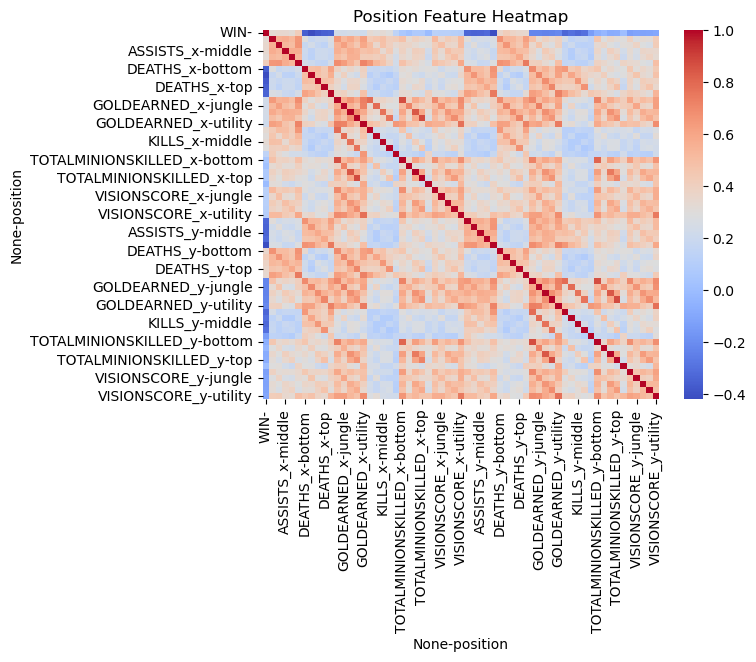

In [61]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create a correlation matrix
corr = finalMerged.corr()

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr, cmap="coolwarm")
plt.title('Position Feature Heatmap')
plt.show()


In [62]:
X = finalMerged.drop(columns=["matchID","WIN"])
y = finalMerged["WIN"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

C:\Users\oqiu1\AppData\Local\Temp\ipykernel_5128\1718832235.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  X = finalMerged.drop(columns=["matchID","WIN"])


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter space for the hyperparameters to search over
param_dist = {
    "max_depth": [3, None],
    "max_features": randint(1, 9),
    "min_samples_leaf": randint(1, 9),
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
}

# Create a decision tree classifier object
clf = DecisionTreeClassifier()

# Perform random search
n_iter_search = 10
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search, cv=5
)

# Fit the model to the data
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
# Print the best hyperparameters and model performance
print("Best hyperparameters:", random_search.best_params_)
print("Training accuracy:", random_search.best_score_)
print("Testing accuracy:", random_search.score(X_test, y_test))


Best hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 8, 'splitter': 'best'}
Training accuracy: 0.8441977998910442
Testing accuracy: 0.8436154949784792


In [64]:
from sklearn import tree

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



clf= DecisionTreeClassifier(**best_params)
clf.fit(X_train, y_train)

prediction_train = clf.predict(X_train)
print("Train Prediction: ", prediction_train)

prediction_test = clf.predict(X_test)
print("Test Prediction: ", prediction_test)

train_score = accuracy_score(y_train, prediction_train)
print("Train Score: ", train_score)

test_score = accuracy_score(y_test, prediction_test)
print("Test Score: ", test_score)

recall = recall_score(y_test, prediction_test)
print("Recall Score: ", recall)

f1 = f1_score(y_test, prediction_test)
print("F1 Score: ", f1)

Train Prediction:  [0 0 0 ... 0 1 0]
Test Prediction:  [1 1 0 ... 1 0 0]
Train Score:  0.914180687120034
Test Score:  0.8407460545193687
Recall Score:  0.8267716535433071
F1 Score:  0.8412017167381973


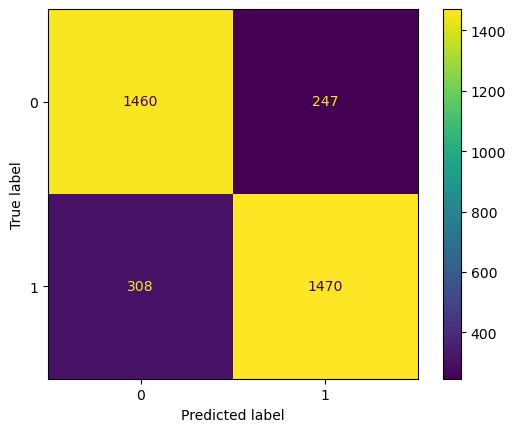

In [65]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
disp.ax_.set_title("Confusion Matrix Decision Tree")
disp.plot()

plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter space for the hyperparameters to search over
param_dist = {
    "penalty": ["l1", "l2", "elasticnet", "none"],
    "C": uniform(0, 10),
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [100, 500, 1000, 5000],
    "tol": uniform(0, 0.01)
}

# Create a logistic regression classifier object
clf = LogisticRegression()

# Perform random search
n_iter_search = 10
random_search = RandomizedSearchCV(
    clf, param_distributions=param_dist, n_iter=n_iter_search, cv=5
)

# Fit the model to the data
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
# Print the best hyperparameters and model performance
print("Best hyperparameters:", random_search.best_params_)
print("Training accuracy:", random_search.best_score_)
print("Testing accuracy:", random_search.score(X_test, y_test))


C:\Users\oqiu1\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\oqiu1\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\oqiu1\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\oqiu1\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\oqiu1\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1173: FutureW

Best hyperparameters: {'C': 8.543461566279216, 'max_iter': 500, 'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.002794147902199593}
Training accuracy: 0.9745508069231962
Testing accuracy: 0.9713055954088953


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Create a logistic regression classifier object with the best hyperparameters
clf = LogisticRegression(**best_params)

# Fit the model to the data
clf.fit(X_train, y_train)

# Make predictions on the training data
prediction_train = clf.predict(X_train)
print("Train Prediction: ", prediction_train)

prediction_test = clf.predict(X_test)
print("Test Prediction: ", prediction_test)


train_score = accuracy_score(y_train, prediction_train)
print("Train Score: ", train_score)

test_score = accuracy_score(y_test, prediction_test)
print("Test Score: ", test_score)

# Calculate the recall and F1 scores for the test data
recall = recall_score(y_test, prediction_test)
print("Recall Score: ", recall)

f1 = f1_score(y_test, prediction_test)
print("F1 Score: ", f1)


C:\Users\oqiu1\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\oqiu1\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Train Prediction:  [0 0 0 ... 1 1 0]
Test Prediction:  [1 1 1 ... 1 0 0]
Train Score:  0.9787925915453132
Test Score:  0.9713055954088953
Recall Score:  0.969066366704162
F1 Score:  0.9717992103778905


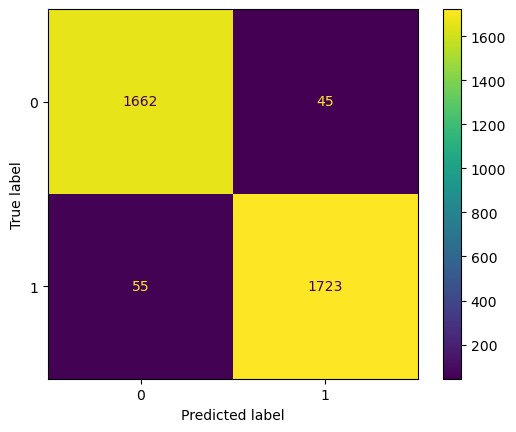

In [80]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, prediction_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)

disp.plot()

plt.show()